## Generate random dataset with 2 clusters of different density

In [1]:
import numpy as np
import pandas as pd
%pylab inline
df = pd.read_csv('abalone_data.csv')
sex=sorted(df['sex'].unique())
genders_mapping=dict(zip(sex, range(0,len(sex)+1)))
df['sex_val']=df['sex'].map(genders_mapping).astype(int)
df=df.drop(['sex'], axis=1)

df['rings_val']=(df['rings']-min(df['rings']))/max(df['rings'])
df=df.drop(['rings'], axis=1)

df['rings_val'].describe()

Populating the interactive namespace from numpy and matplotlib


count    4177.000000
mean        0.308058
std         0.111178
min         0.000000
25%         0.241379
50%         0.275862
75%         0.344828
max         0.965517
Name: rings_val, dtype: float64

In [2]:
dataset = np.vstack([df])
dataset

array([[ 0.455     ,  0.365     ,  0.095     , ...,  0.15      ,
         2.        ,  0.48275862],
       [ 0.35      ,  0.265     ,  0.09      , ...,  0.07      ,
         2.        ,  0.20689655],
       [ 0.53      ,  0.42      ,  0.135     , ...,  0.21      ,
         0.        ,  0.27586207],
       ..., 
       [ 0.6       ,  0.475     ,  0.205     , ...,  0.308     ,
         2.        ,  0.27586207],
       [ 0.625     ,  0.485     ,  0.15      , ...,  0.296     ,
         0.        ,  0.31034483],
       [ 0.71      ,  0.555     ,  0.195     , ...,  0.495     ,
         2.        ,  0.37931034]])

## Apply DBSCAN
Fix min_pts=5 and try several eps between 0 and 1

Plot noise size vs. epsilon

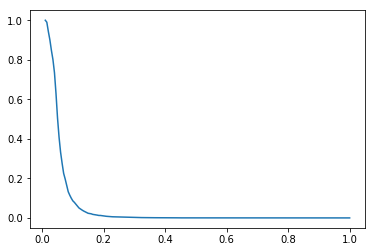

In [3]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN

xx = np.linspace(0.01, 1.00, 200)
yy = list()
for eps in xx:
    dbscan = DBSCAN(eps, min_samples=5, metric='euclidean')
    dbscan.fit(dataset)
    labels = dbscan.labels_
    # yy = size of noise cluster
    yy.append(float(len([1 for i in labels if i == -1])) / len(dataset))
plot(xx, yy)

In [4]:
# scegliamo eps per avere 1 % di outliers
my_eps = min( [ xx[i] for i in range(len(xx)) if yy[i]<0.01 ] )
print (my_eps)

0.204020100503


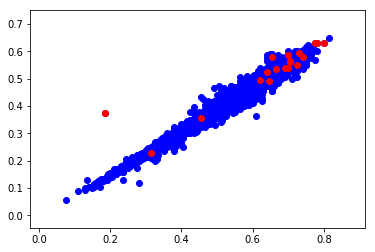

In [5]:
dbscan = DBSCAN(my_eps, min_samples=3, metric='euclidean')
dbscan.fit(dataset)
labels = dbscan.labels_
noise = array([ dataset[i] for i in range(len(dataset)) if labels[i]==-1])

xlim(min(dataset[:,0]-0.1), max(dataset[:,0])+0.1)
ylim(min(dataset[:,1]-0.1), max(dataset[:,1])+0.1)

plot(dataset[:,0], dataset[:,1], 'bo')
plot(noise[:,0], noise[:,1], 'ro')

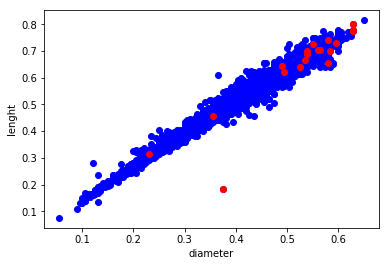

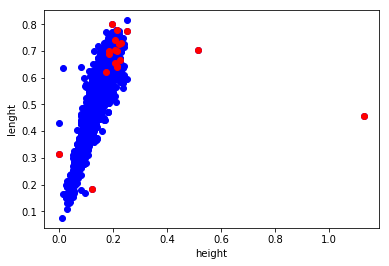

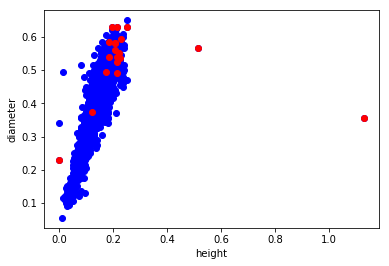

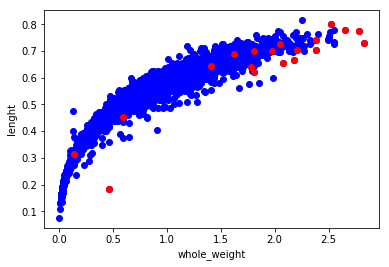

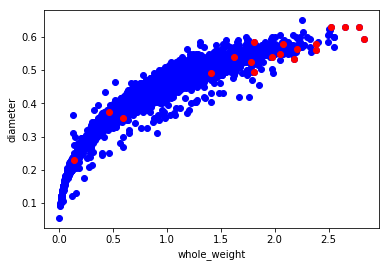

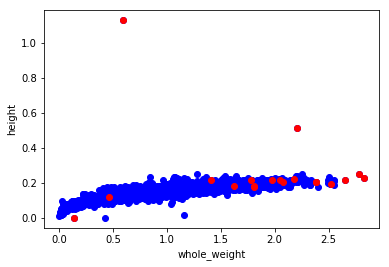

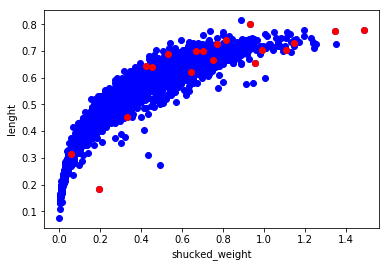

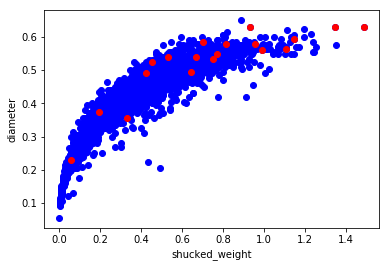

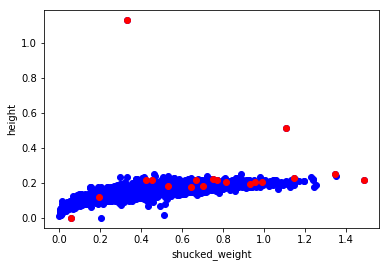

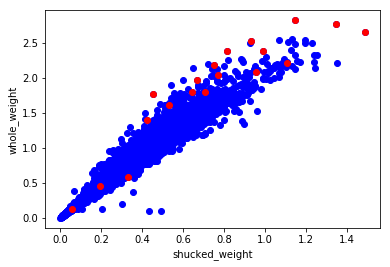

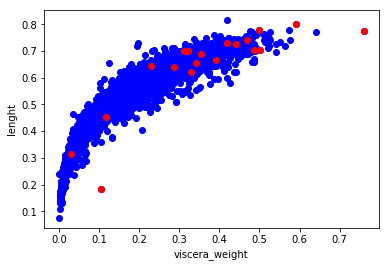

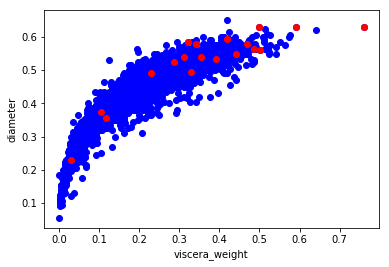

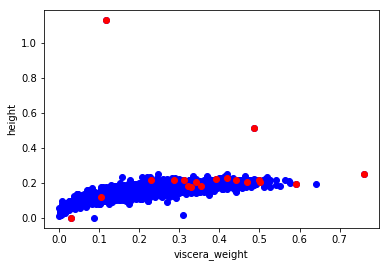

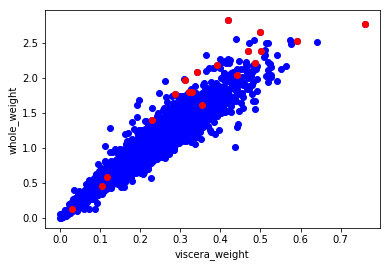

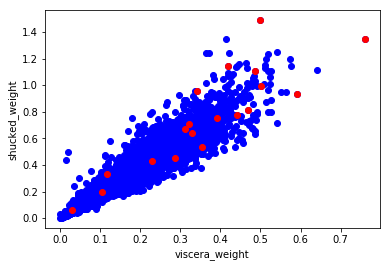

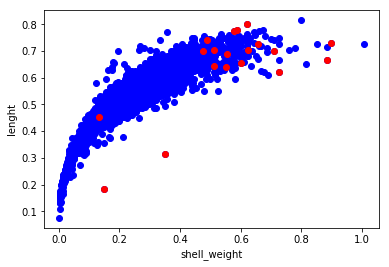

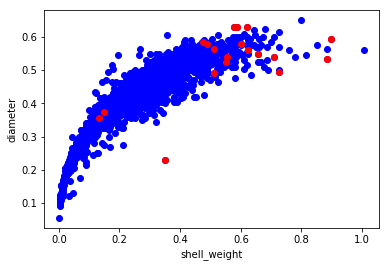

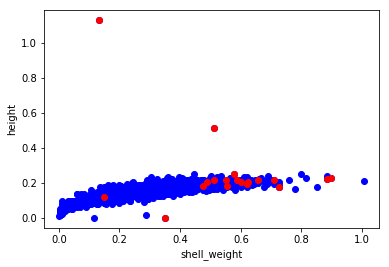

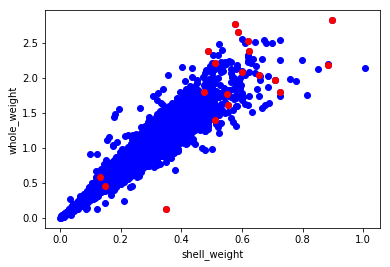

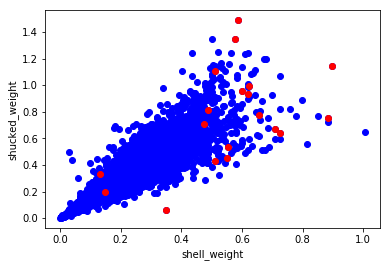

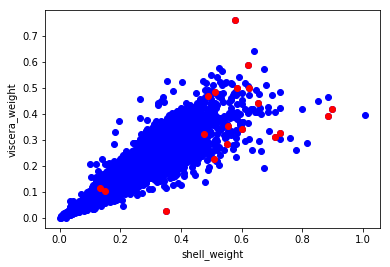

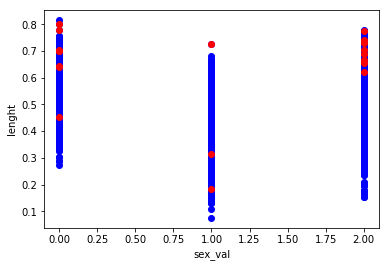

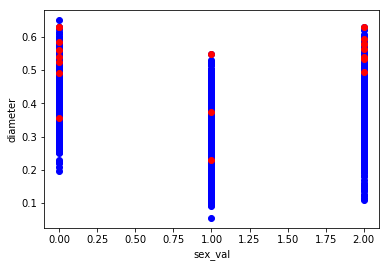

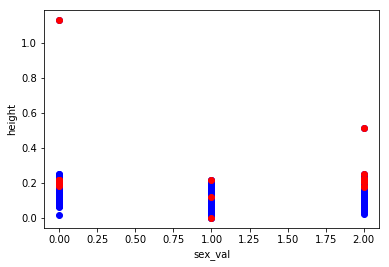

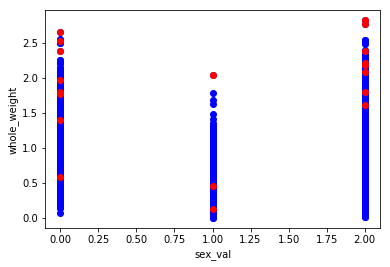

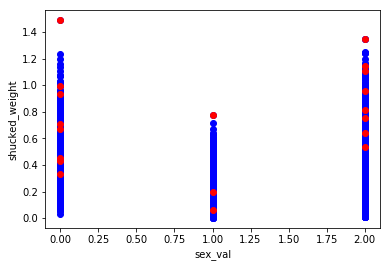

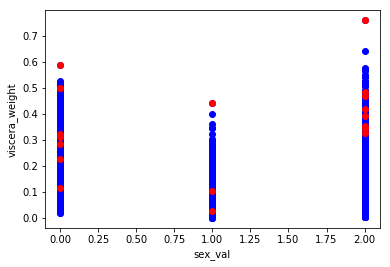

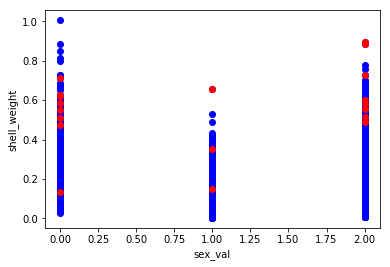

In [6]:
for i in range(8):
    for j in range(8):
        if i > j:
            plot(dataset[:,i], dataset[:,j], 'bo')
            plot(noise[:,i], noise[:,j], 'ro')
            xlabel(df.columns[i])
            ylabel(df.columns[j])
            show()